In [2]:

import xarray as xr
import datetime as dt
import cmocean
import dateutil as dutil
from salishsea_tools import viz_tools, places, evaltools as et
import matplotlib.dates as mdates
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import datetime as dt
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 
mpl.rc('legend', numpoints= 1)
mpl.rc('lines', markersize= 8)
%matplotlib inline

## Light Response

In [3]:
def newlight(mumax,a,Imax,I):
    #a=alpha/mumax
    alpha=a*mumax
    beta=alpha/(np.exp(Imax*alpha/mumax)-1)
    b=beta/mumax
    f=(alpha+beta)/alpha*((alpha+beta)/beta)**(beta/alpha)
    mu=mumax*(1-np.exp(-a*I))*(np.exp(-b*I))*f
    return mu

In [26]:
I=np.arange(0,700)
mumaxH={'d':5.486816753e-05,'f':1.945325940e-05,'d2':6.0349996E-05}
IoptH={'d':62.658287255,'f':14.918639823,'d2':67.13387920}
aH={'d':0.07215007215,'f':0.30303030303,'d2':0.067340067}

mumaxJ={'d':5.7e-05,'f':1.8e-05}
IoptJ={'d':75,'f':20}
aJ={'d':0.052,'f':0.38}

Text(0.5, 1.0, 'Light-dependent growth')

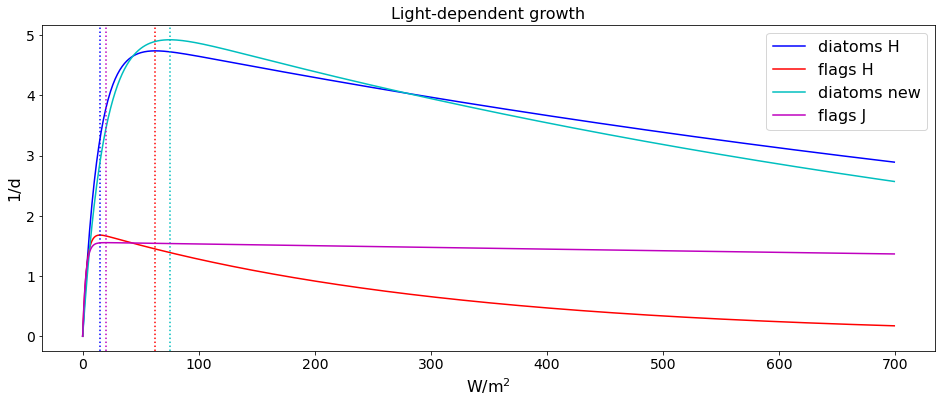

In [27]:
fig,ax=plt.subplots(1,1,figsize=(16,6))
s='d'
ax.plot(I,newlight(mumaxH[s],aH[s],IoptH[s],I)*24*3600,'b-',label='diatoms H')
ax.axvline(IoptH[s],color='r',linestyle=':')
#s='d2'
#ax.plot(I,newlight(mumaxH[s],aH[s],IoptH[s],I)*24*3600,'b--',label='diatoms 1905')
#ax.axvline(IoptH[s],color='r',linestyle=':')
s='f'
ax.plot(I,newlight(mumaxH[s],aH[s],IoptH[s],I)*24*3600,'r-',label='flags H')
ax.axvline(IoptH[s],color='b',linestyle=':')

s='d'
ax.plot(I,newlight(mumaxJ[s],aJ[s],IoptJ[s],I)*24*3600,'c-',label='diatoms new')
ax.axvline(IoptJ[s],color='c',linestyle=':')
s='f'
ax.plot(I,newlight(mumaxJ[s],aJ[s],IoptJ[s],I)*24*3600,'m-',label='flags J')
ax.axvline(IoptJ[s],color='m',linestyle=':')

ax.legend()
ax.set_xlabel('W/m$^2$')
ax.set_ylabel('1/d')
ax.set_title('Light-dependent growth')

Text(0.5, 1.0, 'Light-dependent growth')

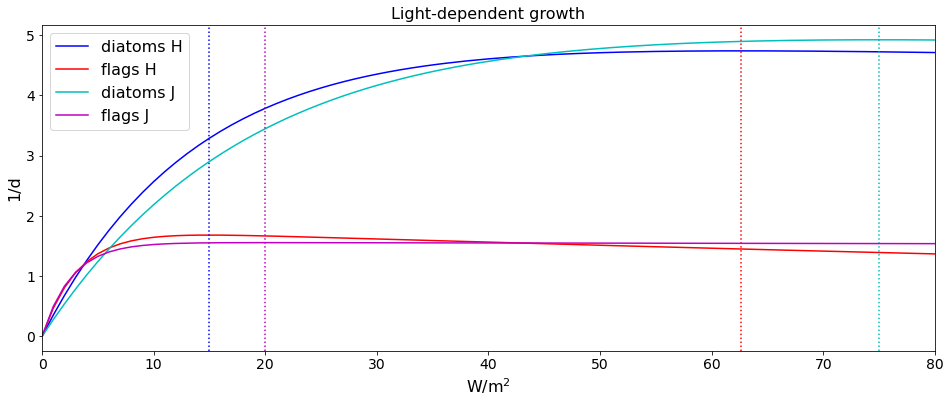

In [28]:
fig,ax=plt.subplots(1,1,figsize=(16,6))
s='d'
ax.plot(I,newlight(mumaxH[s],aH[s],IoptH[s],I)*24*3600,'b-',label='diatoms H')
ax.axvline(IoptH[s],color='r',linestyle=':')
s='f'
ax.plot(I,newlight(mumaxH[s],aH[s],IoptH[s],I)*24*3600,'r-',label='flags H')
ax.axvline(IoptH[s],color='b',linestyle=':')

s='d'
ax.plot(I,newlight(mumaxJ[s],aJ[s],IoptJ[s],I)*24*3600,'c-',label='diatoms J')
ax.axvline(IoptJ[s],color='c',linestyle=':')
s='f'
ax.plot(I,newlight(mumaxJ[s],aJ[s],IoptJ[s],I)*24*3600,'m-',label='flags J')
ax.axvline(IoptJ[s],color='m',linestyle=':')

ax.legend()
ax.set_xlim(0,80)
ax.set_xlabel('W/m$^2$')
ax.set_ylabel('1/d')
ax.set_title('Light-dependent growth')

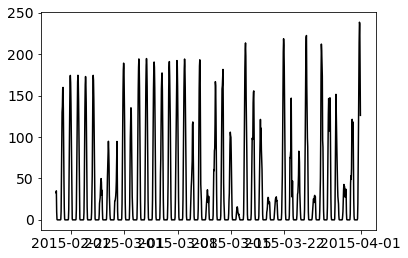

In [30]:
plt.plot(tt,par,'k-')

In [245]:
mumaxJ={'d':5.6e-05,'f':1.8e-05}
IoptJ={'d':75,'f':20}
aJ={'d':0.052,'f':0.25}

In [269]:
mumaxJ={'d':5.7e-05,'f':1.8e-05}
IoptJ={'d':70,'f':20}
aJ={'d':0.05,'f':0.25}

In [271]:
mumaxJ={'d':5.8e-05,'f':1.8e-05}
IoptJ={'d':75,'f':20}
aJ={'d':0.045,'f':0.25}

Text(0.5, 1.0, 'Light-dependent growth')

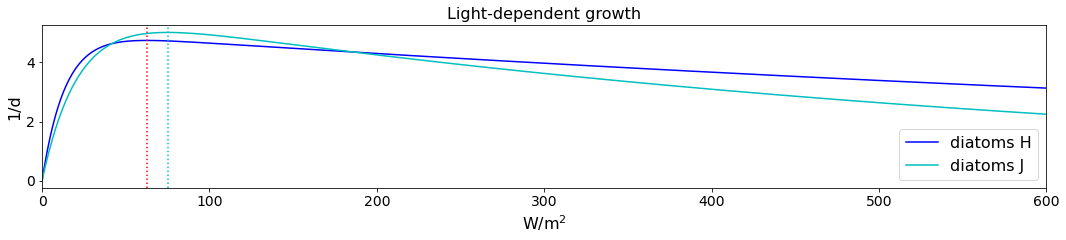

In [272]:
fig,ax=plt.subplots(1,1,figsize=(18,3))
s='d'
ax.plot(I,newlight(mumaxH[s],aH[s],IoptH[s],I)*24*3600,'b-',label='diatoms H')
ax.axvline(IoptH[s],color='r',linestyle=':')

#ax.plot(I,newlight(5.65e-05,0.052,75,I)*24*3600,'k-',label='diatoms J')
#ax.axvline(IoptJ[s],color='c',linestyle=':')
s='d'
ax.plot(I,newlight(mumaxJ[s],aJ[s],IoptJ[s],I)*24*3600,'c-',label='diatoms J')
ax.axvline(IoptJ[s],color='c',linestyle=':')

ax.legend()
ax.set_xlim(0,600)
ax.set_xlabel('W/m$^2$')
ax.set_ylabel('1/d')
ax.set_title('Light-dependent growth')

In [273]:
s='d'
lightold=newlight(mumaxH[s],aH[s],IoptH[s],par)*24*3600
lightnew=newlight(mumaxJ[s],aJ[s],IoptJ[s],par)*24*3600
lightoldDay=np.array([np.mean(lightold[(5+i0*24):(5+(i0+1)*24)]) for i0 in range(0,int(len(lightold)/24))])
lightnewDay=np.array([np.mean(lightnew[(5+i0*24):(5+(i0+1)*24)]) for i0 in range(0,int(len(lightnew)/24))])

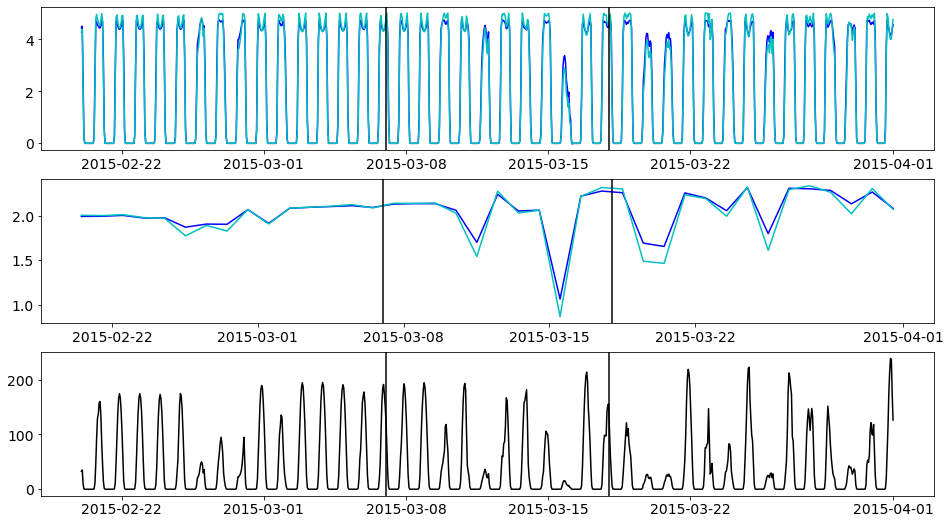

In [274]:
fig,ax=plt.subplots(3,1,figsize=(16,9))
s='d'
ax[0].plot(tt,lightold,'b-')
ax[0].plot(tt,lightnew,'c-')
ax[1].plot(tt[12::24],lightoldDay,'b-')
ax[1].plot(tt[12::24],lightnewDay,'c-')
ax[2].plot(tt,par,'k-')
for iax in ax:
    iax.axvline(dt.datetime(2015,3,7),color='k')
    iax.axvline(dt.datetime(2015,3,18),color='k')